# Support Vector Machines
Another essential tool to have as a Data Scientist is a Support Vector Machine (SVM).  The simplest of SVMs work by finding a pair of parallel lines that separate the data while maximizing the *margin* between the lines.  This concept can be extended to not only lines, but any curve through the use of kernels.  In this exercise, you'll use SVMs for both classification and regression tasks.

## Linear SVM
As discussed above, the simplest of SVMs work by finding a pair of straight lines, or hyperplanes, which separate the data into two categories while maximizing the distance between them.  Analytically, the hyperplanes can be described by the equations $${\vec {w}}\cdot {\vec {x}}-b=1$$ and $${\vec {w}}\cdot {\vec {x}}-b=-1$$ where $\vec{w}$ is the normal vector to the plane, $\vec{x}$ is the set of data points, and $b$ is the intercept.  The minimization problem then becomes to minimize $\|{\vec{w}}\|$ subject to $${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1,}$$ for $${\displaystyle i=1,\,\ldots ,\,n} {\displaystyle i=1,\,\ldots ,\,n}$$ where $y_i$ is either 1 or -1, representing the categories of $x_i$.

In this exercise, you'll explore these concepts with both user generated and real world data.

1 - Create a set of 100 linearly separable points and create a scatter plot, color coding your data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(56)

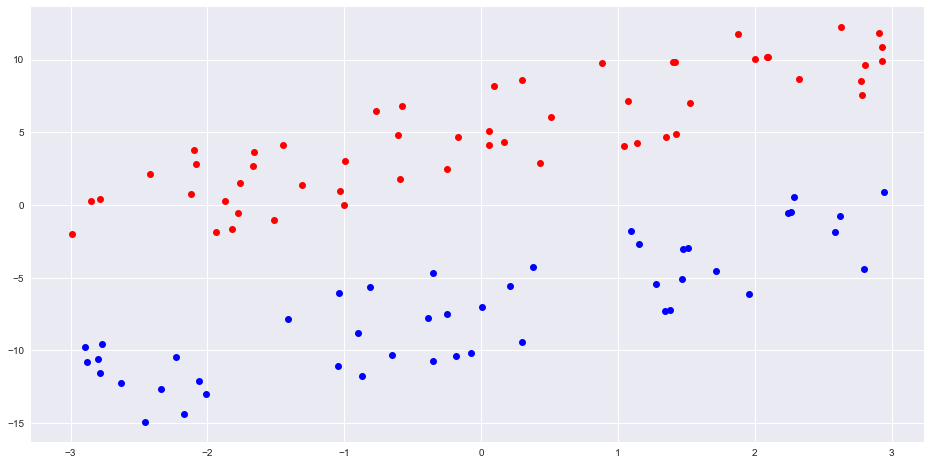

In [2]:
# random points between a and b
a = -3
b = 3
X1_lsep = (b - a)*np.random.rand(100) + a
# apply linear equation
X2_lsep = 2*X1_lsep - 1
# add noise +- random integer between a and b
a = 3
b = 10
noise = np.random.choice([-1, 1], 100) *  np.random.choice(np.arange(a, b), 100)
# stack coordinates
X_lsep = np.vstack((X1_lsep, X2_lsep + noise)).T
# categorize using linear equation
y_lsep = np.array((X2_lsep + noise >= X2_lsep), dtype=int)
# plot categories
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_lsep[:, 0][y_lsep==0], X_lsep[:, 1][y_lsep==0], 'bo')
ax.plot(X_lsep[:, 0][y_lsep==1], X_lsep[:, 1][y_lsep==1], 'ro');

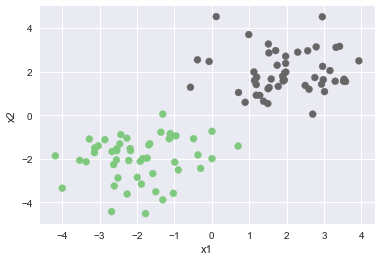

In [3]:
# solution:
X = np.r_[np.random.randn(50, 2) - [2, 2], np.random.randn(50, 2) + [2, 2]]
y = [0] * 50 + [1] * 50

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
plt.xlabel('x1')
plt.ylabel('x2')

2 - Now fit a linear SVM to the data, using different values for the `C` parameter of varying orders of magnitude.  Plot the decision lines, margins, and boundary for each.  Comment on your results.

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',
                   edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
from sklearn.svm import SVC
linsvc = SVC(kernel='linear')

Score for C = 0.001: 0.95000
Score for C = 0.01: 1.00000
Score for C = 0.1: 1.00000
Score for C = 1: 1.00000
Score for C = 10: 1.00000
Score for C = 100: 1.00000
Score for C = 1000: 1.00000
Score for C = 10000: 1.00000
Score for C = 100000: 1.00000


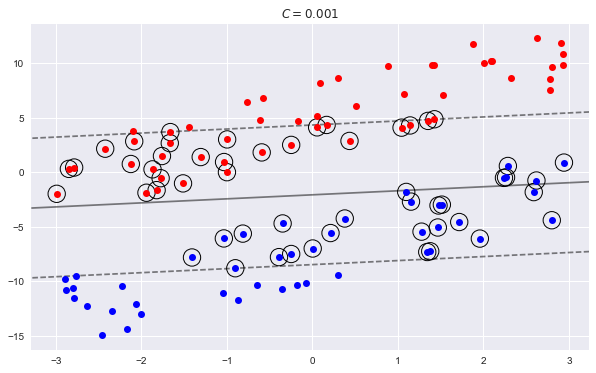

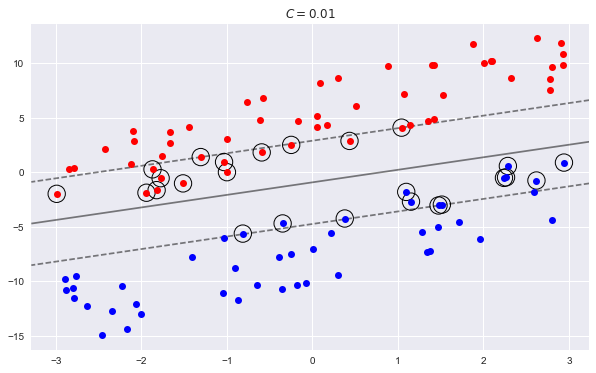

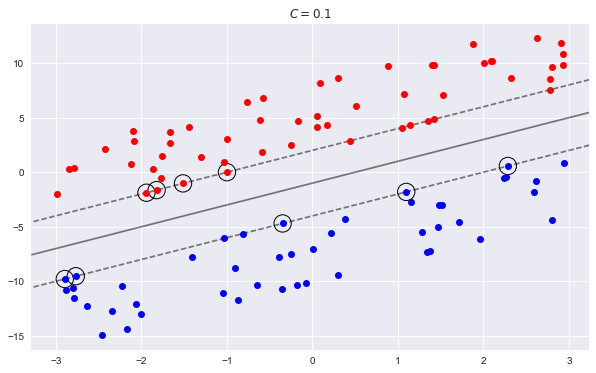

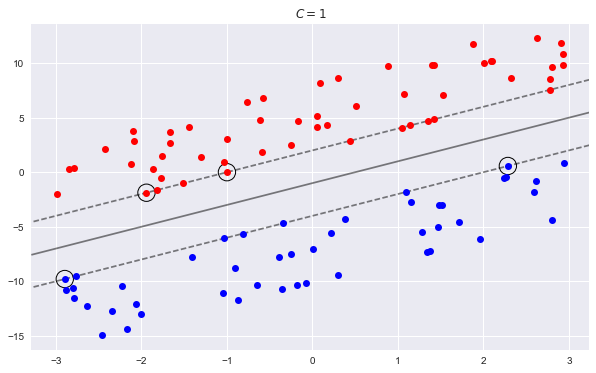

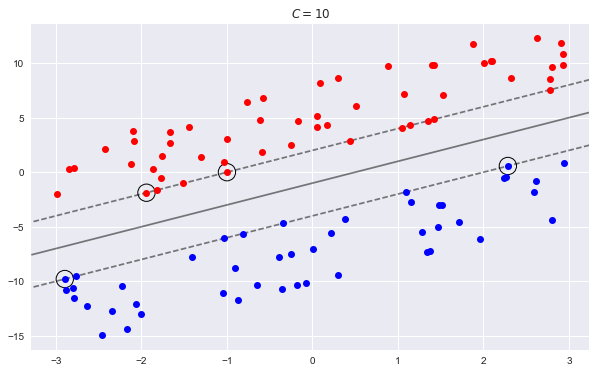

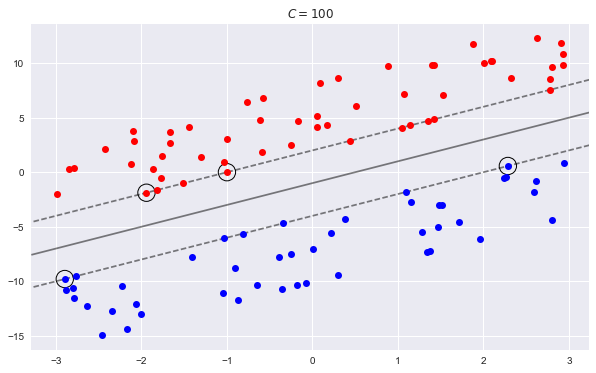

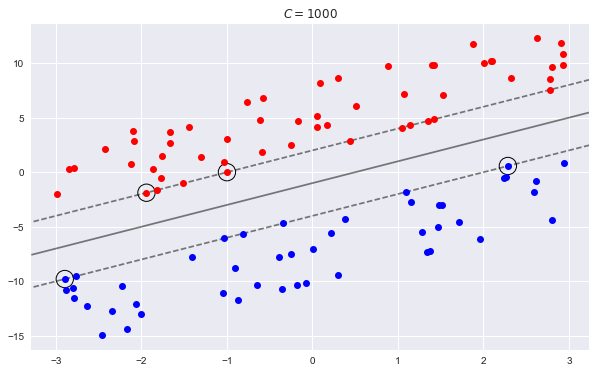

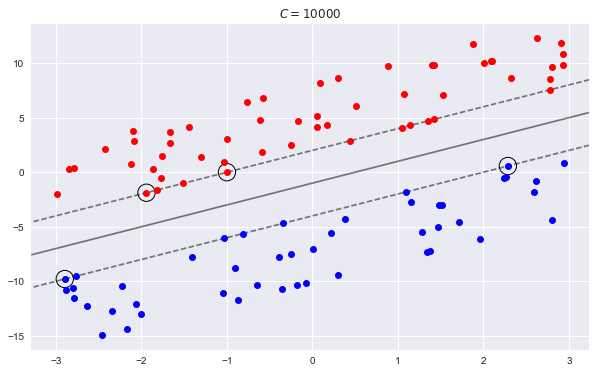

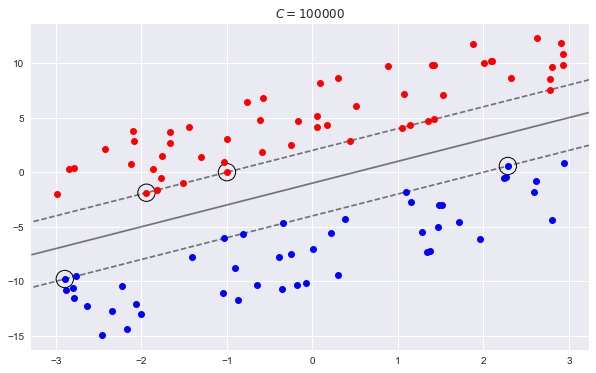

In [5]:
# i'm trying different order of magnitudes of C
for C in [10**i for i in range(-3, 6)]:
    # set params and fit
    linsvc.set_params(C=C)
    linsvc.fit(X_lsep, y_lsep)
    # score model
    print('Score for C = {}: {:.5f}'.format(C, linsvc.score(X_lsep, y_lsep)))
    # plot points and SVM boundaries
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('$C = {}$'.format(C))
    ax.plot(X_lsep[:, 0][y_lsep==0], X_lsep[:, 1][y_lsep==0], 'bo')
    ax.plot(X_lsep[:, 0][y_lsep==1], X_lsep[:, 1][y_lsep==1], 'ro')
    plot_svc_decision_function(linsvc, ax=ax, plot_support=True);

The data is very linearly separable, so even for small values of $C$ the SVM classifies correctly all points. Increasing the value we get less and less boundary violations until we get a line very close to the one used to generate the points.

In [5]:
# solution
c_vals = [10**n for n in range(-5, 5, 1)]

models = []
for c in c_vals:
    svc = SVC(kernel='linear', C=c, random_state=0)
    svc.fit(X, y)
    models.append(svc)

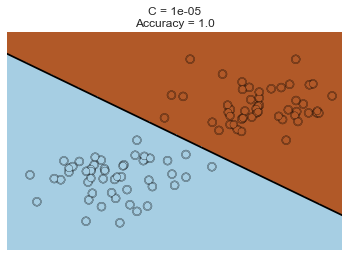

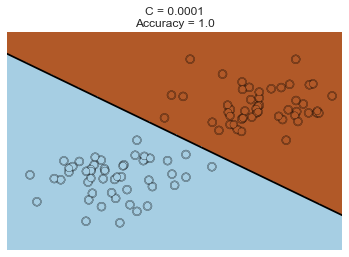

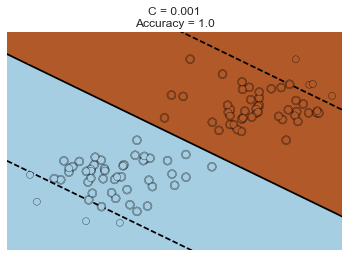

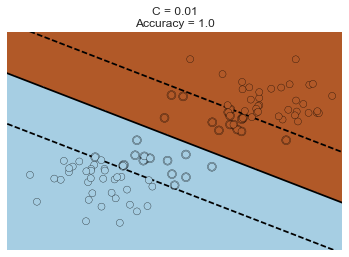

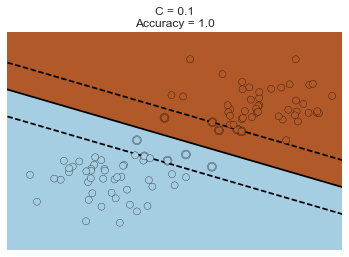

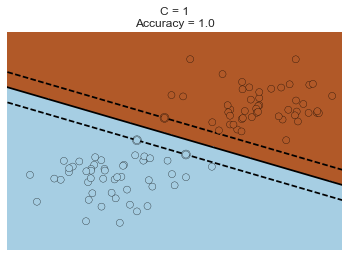

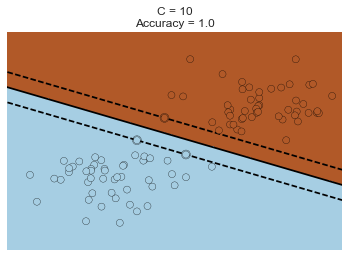

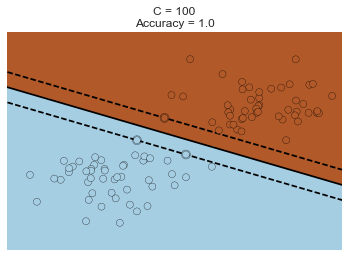

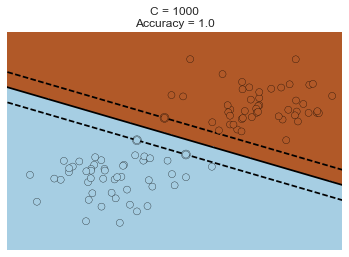

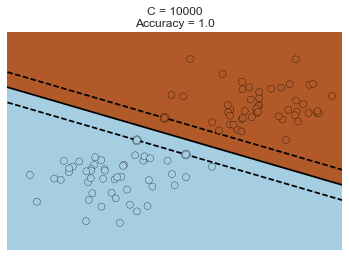

In [7]:
# solution
fignum = 1
for clf in models:
    # get the separating hyperplance
    w = clf.coef_[0]
    a = - w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - clf.intercept_[0] / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum)
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.title('C = ' + str(clf.get_params()['C']) + '\n' + 'Accuracy = ' + str(clf.score(X, y)))
    
    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    
    fignum += 1

3 - Create a data set, as in part (1), but this time make it very noisy, i.e. deliberately make it not quite so linearly separable.

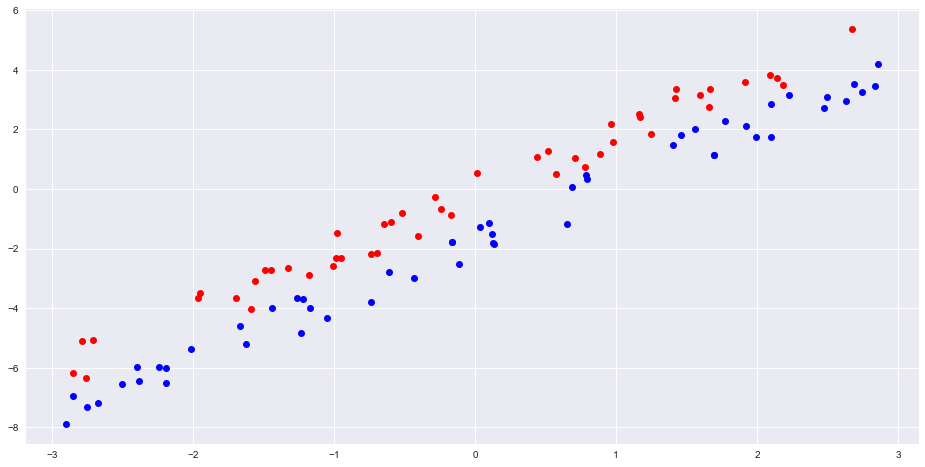

In [6]:
# random points between a and b
a = -3
b = 3
X1_nlsep = (b - a)*np.random.rand(100) + a
# apply linear equation
X2_nlsep = 2*X1_nlsep - 1
# add noise +- random float between a and b
a = 0.1
b = 1.5
noise = np.random.choice([-1, 1], 100) *  np.random.choice(np.linspace(a, b, 50), 100)
# stack coordinates
X_nlsep = np.vstack((X1_nlsep, X2_nlsep + noise)).T
# categorize using linear equation
y_nlsep = np.array((X2_nlsep + noise >= X2_nlsep), dtype=int)

# more_noise = np.random.choice(np.arange(100), 10)
# for i in more_noise:
#     y_nlsep[i] = (y_nlsep[i] + 1) % 2

# plot categories
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_nlsep[:, 0][y_nlsep==0], X_nlsep[:, 1][y_nlsep==0], 'bo')
ax.plot(X_nlsep[:, 0][y_nlsep==1], X_nlsep[:, 1][y_nlsep==1], 'ro');

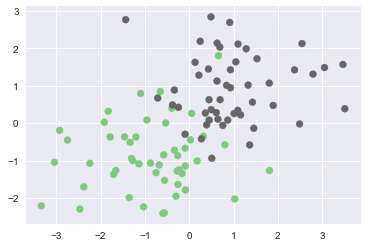

In [8]:
# solution
X = np.r_[np.random.randn(50, 2) - [1, 1], np.random.randn(50, 2) + [1, 1]]
y = [0] * 50 + [1] * 50

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

4 - Repeat part (2) as above and comment on your results.

Score for C = 0.001: 0.51000
Score for C = 0.01: 0.62000
Score for C = 0.1: 1.00000
Score for C = 1: 1.00000
Score for C = 10: 1.00000
Score for C = 100: 1.00000
Score for C = 1000: 1.00000
Score for C = 10000: 1.00000
Score for C = 100000: 1.00000


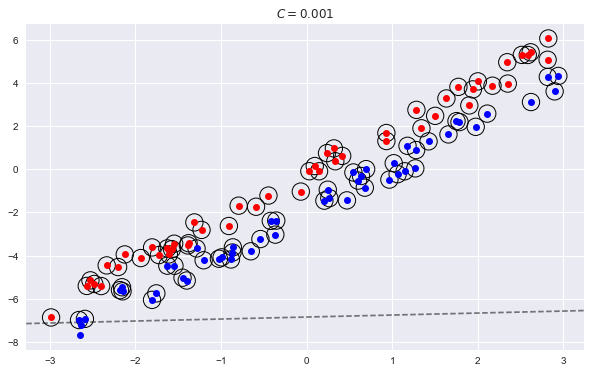

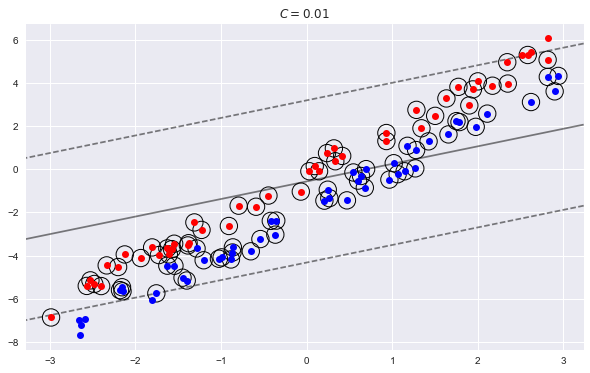

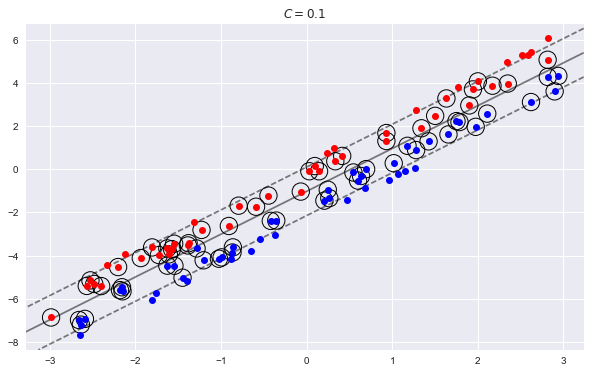

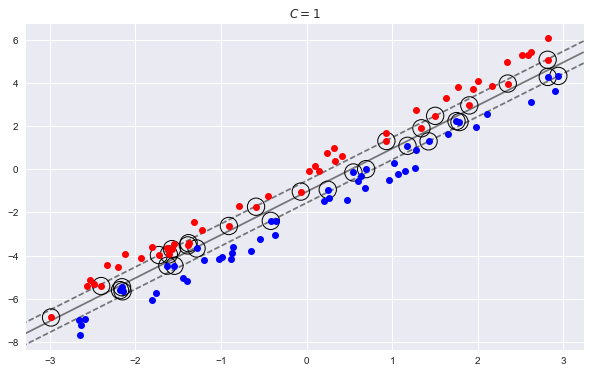

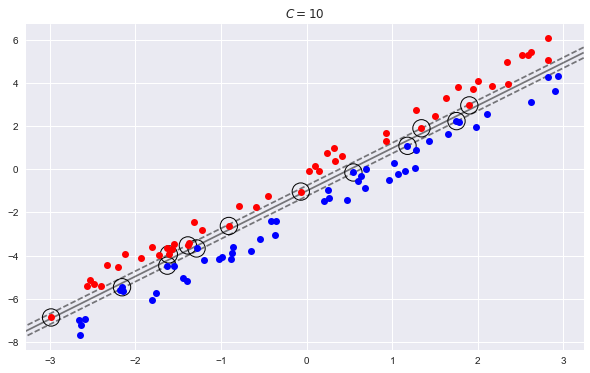

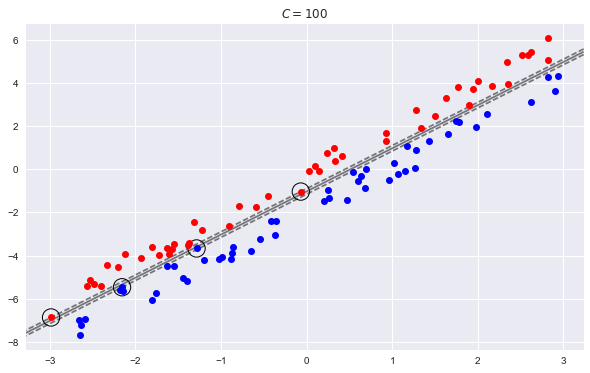

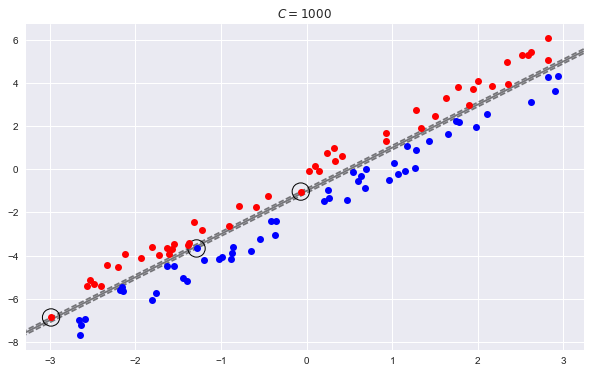

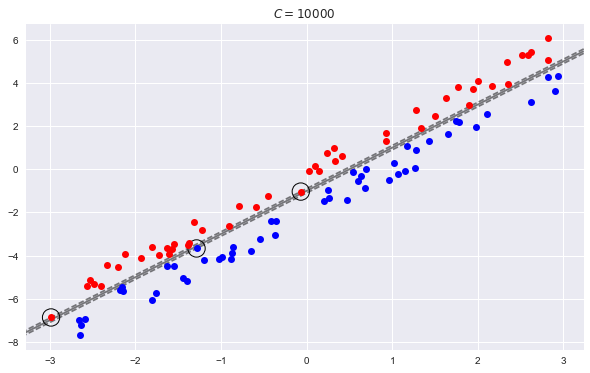

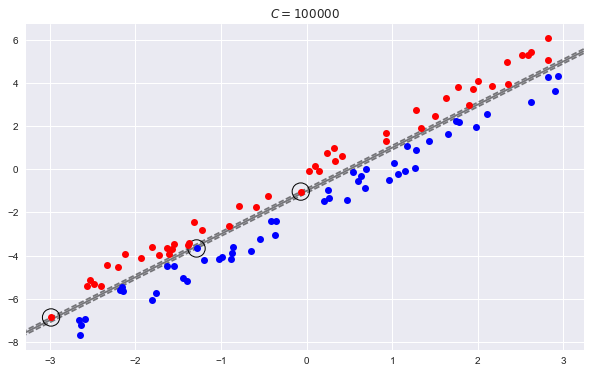

In [112]:
for C in [10**i for i in range(-3, 6)]:
    linsvc.set_params(C=C)
    linsvc.fit(X_nlsep, y_nlsep)
    print('Score for C = {}: {:.5f}'.format(C, linsvc.score(X_nlsep, y_nlsep)))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('$C = {}$'.format(C))
    ax.plot(X_nlsep[:, 0][y_nlsep==0], X_nlsep[:, 1][y_nlsep==0], 'bo')
    ax.plot(X_nlsep[:, 0][y_nlsep==1], X_nlsep[:, 1][y_nlsep==1], 'ro')
    plot_svc_decision_function(linsvc, ax=ax, plot_support=True);

In [9]:
# solution
c_vals = [10**n for n in range(-5, 5, 1)]

models = []
for c in c_vals:
    svc = SVC(kernel='linear', C=c, random_state=0)
    svc.fit(X, y)
    models.append(svc)

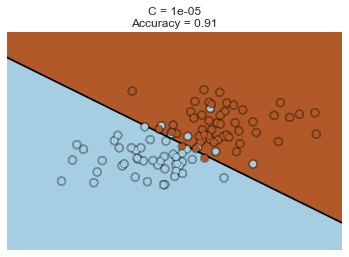

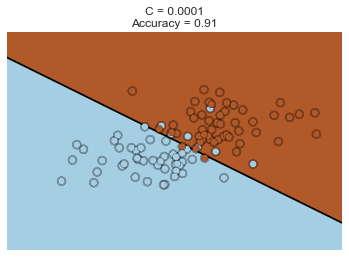

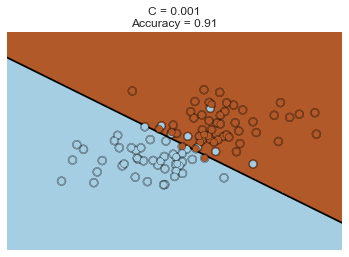

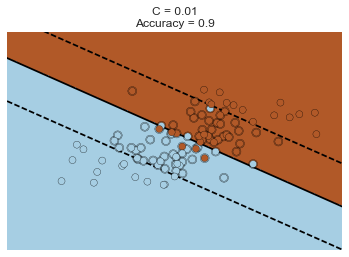

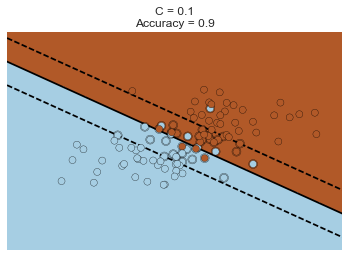

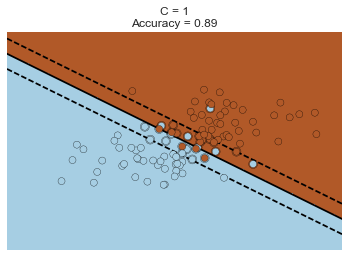

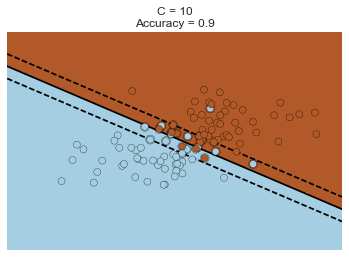

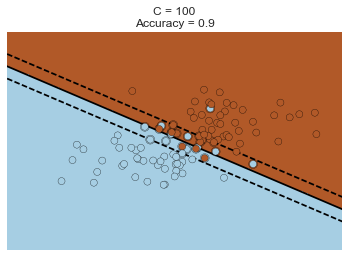

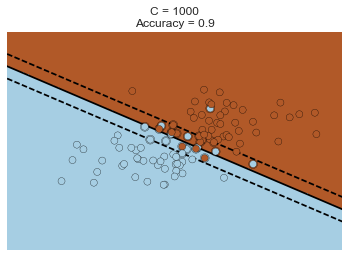

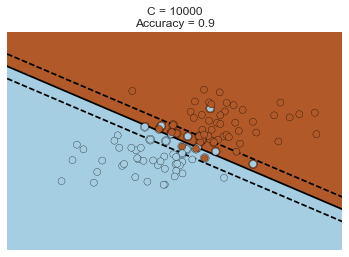

In [10]:
# solution
fignum = 1
for clf in models:
    # get the separating hyperplance
    w = clf.coef_[0]
    a = - w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - clf.intercept_[0] / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum)
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.title('C = ' + str(clf.get_params()['C']) + '\n' + 'Accuracy = ' + str(clf.score(X, y)))
    
    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum)
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    
    fignum += 1

This time for small values of $C$ we get bad results, then we get again very near to the original line but the boundaries are very thin.

5 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Banknote Authentication Data Set](http://archive.ics.uci.edu/ml/datasets/banknote+authentication#), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [7]:
banknote = pd.read_csv('banknote.txt')
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# splitting
Xbank_train, Xbank_test, ybank_train, ybank_test = train_test_split(banknote.iloc[:, :-1], banknote.iloc[:, -1], test_size=0.3, random_state=265)
# scaling
sc = StandardScaler()
sc.fit(Xbank_train)
Xbank_train_std = sc.fit_transform(Xbank_train)
Xbank_test_std = sc.fit_transform(Xbank_test)

6 - Fit a linear SVM to the data for various values of the C parameter, reporting your testing and training accuracies.  Comment on your results.

In [10]:
from sklearn.svm import LinearSVC
linsvc2 = LinearSVC()
# the other SVC scales badly to higher Cs

In [39]:
for C in [10**i for i in range(-3, 6)]:
    linsvc2.set_params(C=C)
    linsvc2.fit(Xbank_train_std, ybank_train)
    print('Training accuracy for C = {}: {:.5f}'.format(C, linsvc2.score(Xbank_train_std, ybank_train)))
    print('Testing accuracy for C = {}: {:.5f}'.format(C, linsvc2.score(Xbank_test_std, ybank_test)))

Training accuracy for C = 0.001: 0.94375
Testing accuracy for C = 0.001: 0.92476
Training accuracy for C = 0.01: 0.98021
Testing accuracy for C = 0.01: 0.97087
Training accuracy for C = 0.1: 0.98438
Testing accuracy for C = 0.1: 0.97816
Training accuracy for C = 1: 0.99375
Testing accuracy for C = 1: 0.98058
Training accuracy for C = 10: 0.99271
Testing accuracy for C = 10: 0.98058
Training accuracy for C = 100: 0.99479
Testing accuracy for C = 100: 0.98544
Training accuracy for C = 1000: 0.98854
Testing accuracy for C = 1000: 0.97573
Training accuracy for C = 10000: 0.99687
Testing accuracy for C = 10000: 0.98058
Training accuracy for C = 100000: 0.99687
Testing accuracy for C = 100000: 0.97816


The results are quite good (this dataset might be almost linearly separable), we can see the training accuracy reaching almost 100% when the regularization is decreased and, as a trade-off, the testing accuracy starts decreasing. The latter is greater for medium values of regularization and reaches its maximum for $C = 100$.

## Non-linear SVM
In the exercise above, we worked with data that was linearly separable and could thus be classified reasonably well with only a linear SVM.  But what if the decision boundary for our data is non-linear?  As it turns out, we can still very effectively use the concepts outlined above, but instead of finding a hyperplane that separates the data, we can use a non-linear kernel function of which `sklearn` provides several.

1 - Create a set of 100 random datapoints separated by the boundary given by $f(x) = sin(x)$.  Plot your points, color coding each.

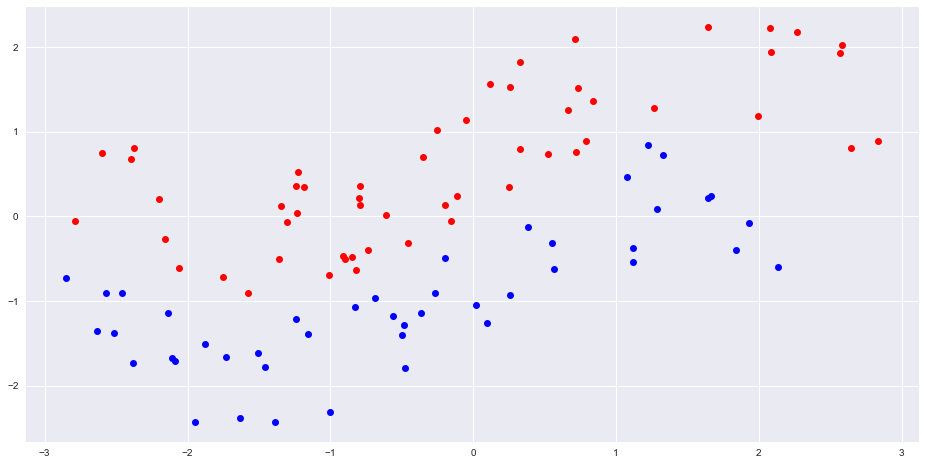

In [29]:
# random points between a and b
a = -3
b = 3
X1_sin = (b - a)*np.random.rand(100) + a
# apply sine
X2_sin = np.sin(X1_sin)
# add noise +- random float between a and b
a = 0.1
b = 1.5
noise = np.random.choice([-1, 1], 100) *  np.random.choice(np.linspace(a, b, 50), 100)
# stack coordinates
X_sin = np.vstack((X1_sin, X2_sin + noise)).T
# categorize using sine
y_sin = np.array((X2_sin + noise >= X2_sin), dtype=int)
# plot categories
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_sin[:, 0][y_sin==0], X_sin[:, 1][y_sin==0], 'bo')
ax.plot(X_sin[:, 0][y_sin==1], X_sin[:, 1][y_sin==1], 'ro');

2 - Fit 4 SVMs to the data using `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`, leaving all other parameters at their default.  Plot the classification and decision boundaries and comment on your results.

In [11]:
kernsvc = SVC()

linear kernel: 0.91000
rbf kernel: 0.98000
poly kernel with degree 2: 0.62000
poly kernel with degree 3: 0.87000


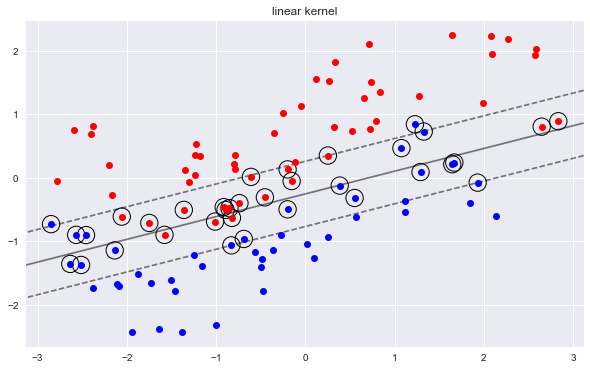

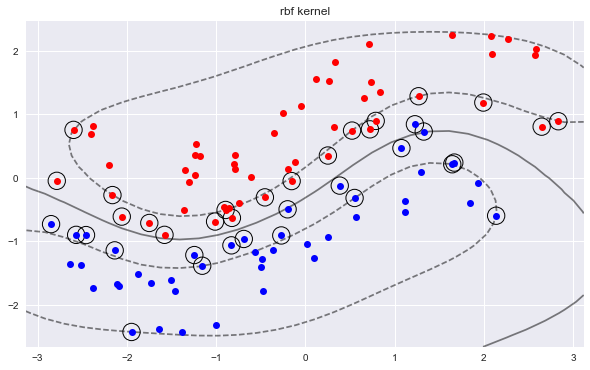

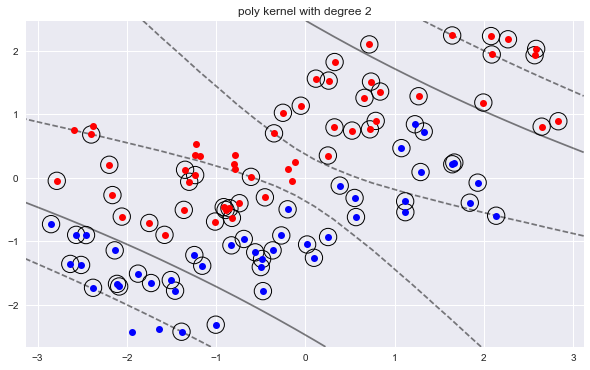

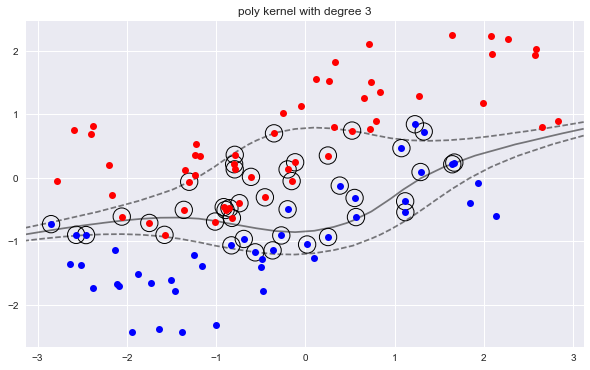

In [30]:
deg = 2

for kernel in ['linear', 'rbf', 'poly', 'poly']:
    # set kernel
    kernsvc.set_params(kernel=kernel)
    # prepare string for printing model details
    message = '{} kernel'.format(kernel)
    # if model is polynomial set degree and add to deg 1 after that
    if kernel == 'poly':
        kernsvc.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    # fit
    kernsvc.fit(X_sin, y_sin)
    # score
    print(message + ': {:.5f}'.format(kernsvc.score(X_sin, y_sin)))
    # plot points and boundaries
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(message)
    ax.plot(X_sin[:, 0][y_sin==0], X_sin[:, 1][y_sin==0], 'bo')
    ax.plot(X_sin[:, 0][y_sin==1], X_sin[:, 1][y_sin==1], 'ro')
    plot_svc_decision_function(kernsvc, ax=ax, plot_support=True);

The linear kernel has quite good performance, but RBF is the best. A degree 2 polynomial is bad, as expected, while the degree 3 polynomial is performing worst than I thought.

In [12]:
# solution
# solution
def make_plot(slf, X, y, kern, size):
    plt.clf()
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.title('kernel = ' + kern + '\n' + 'C = ' + str(clf.get_params()['C']) + '\n' + 'Accuracy = ' + str(clf.score(X, y)))
    
    plt.axis('tight')
    x_min = -size
    x_max = size
    y_min = -size
    y_max = size
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())

3 - Choose the most appropriate two models you found in part (2), and generate plots with decision boundaries for different values of the `C` parameter of differing orders of magnitude.

linear kernel with C = 0.001: 0.55000
linear kernel with C = 0.01: 0.85000
linear kernel with C = 0.1: 0.90000
linear kernel with C = 1: 0.91000
linear kernel with C = 10: 0.89000
linear kernel with C = 100: 0.89000
linear kernel with C = 1000: 0.86000
linear kernel with C = 10000: 0.86000
linear kernel with C = 100000: 0.84000
rbf kernel with C = 0.001: 0.55000
rbf kernel with C = 0.01: 0.55000
rbf kernel with C = 0.1: 0.95000
rbf kernel with C = 1: 0.98000
rbf kernel with C = 10: 1.00000
rbf kernel with C = 100: 1.00000
rbf kernel with C = 1000: 1.00000
rbf kernel with C = 10000: 1.00000
rbf kernel with C = 100000: 1.00000


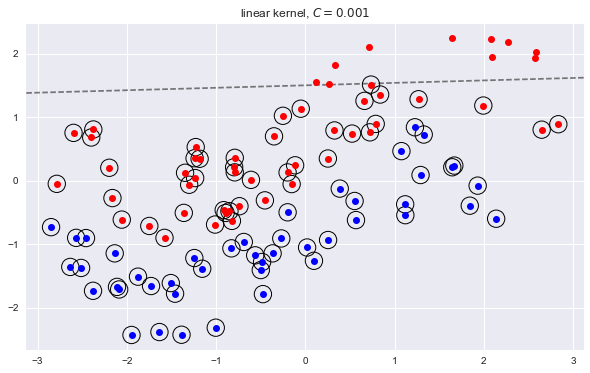

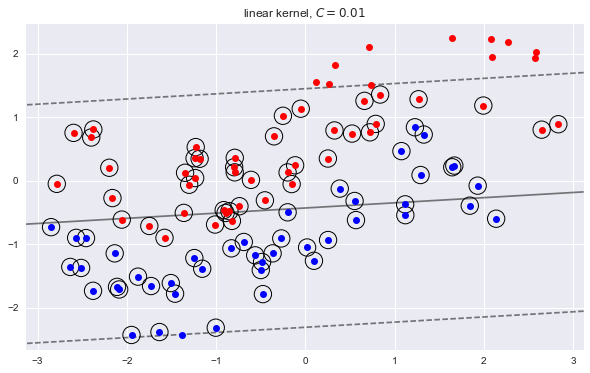

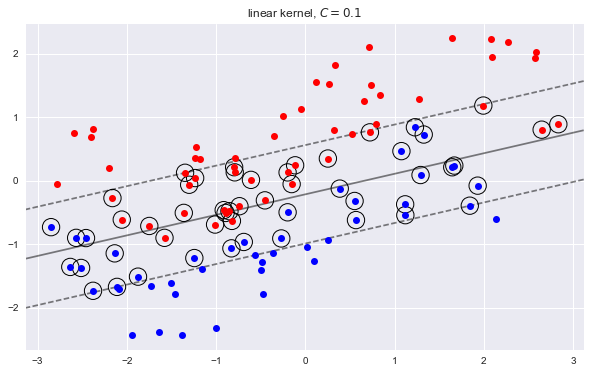

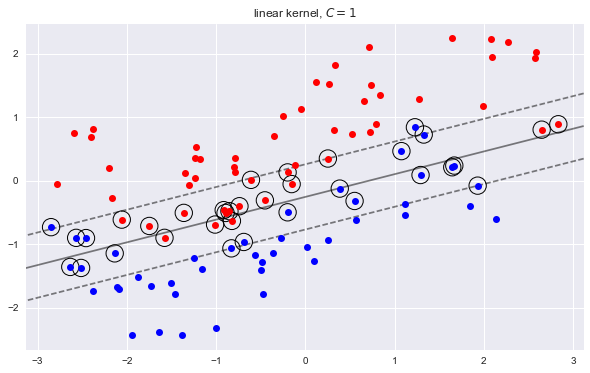

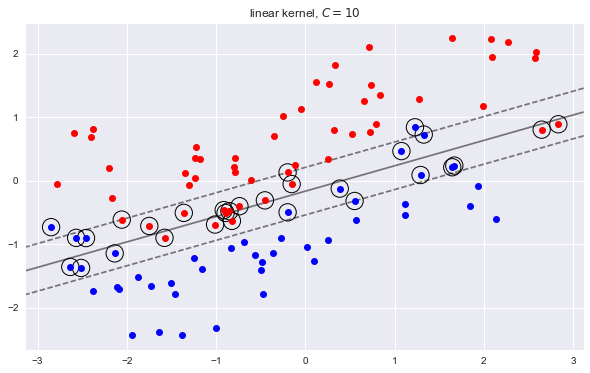

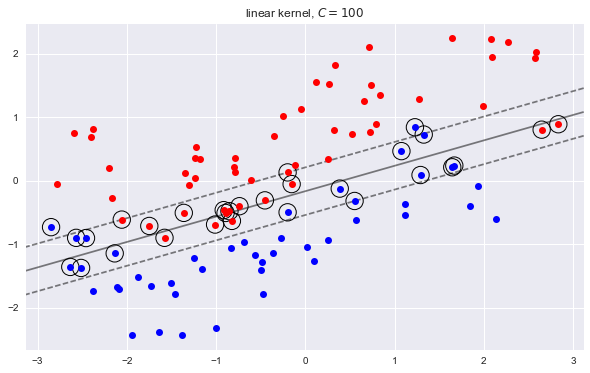

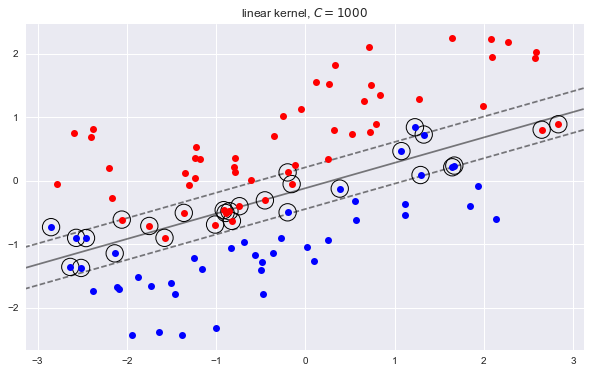

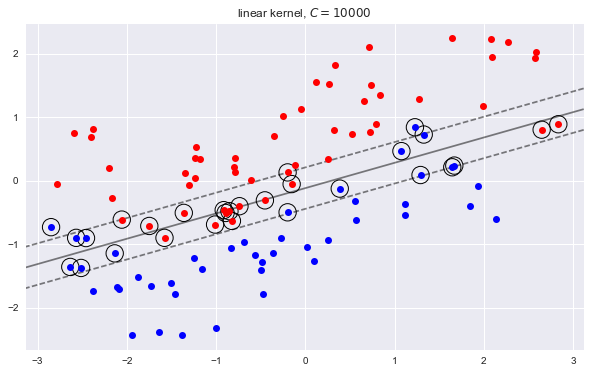

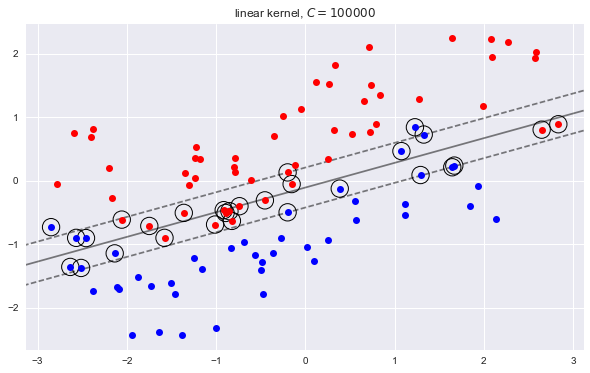

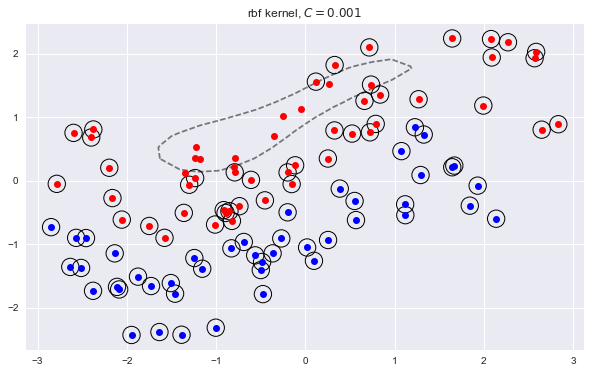

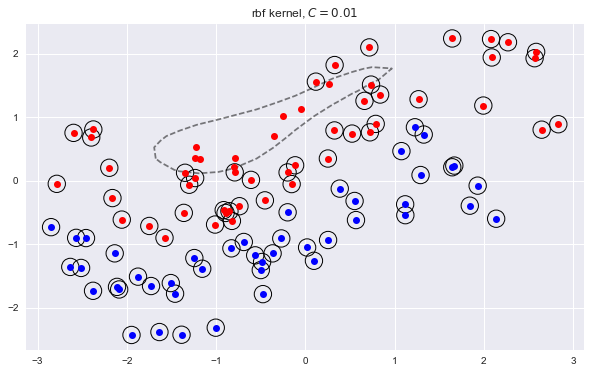

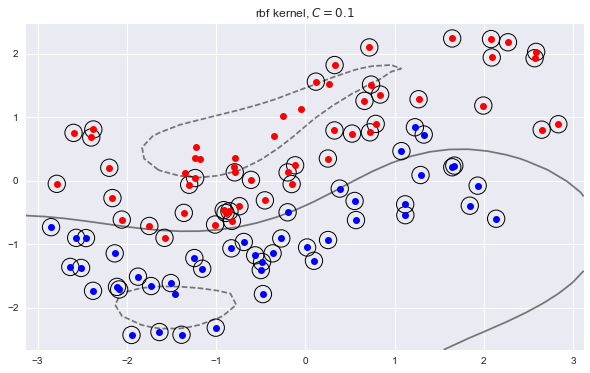

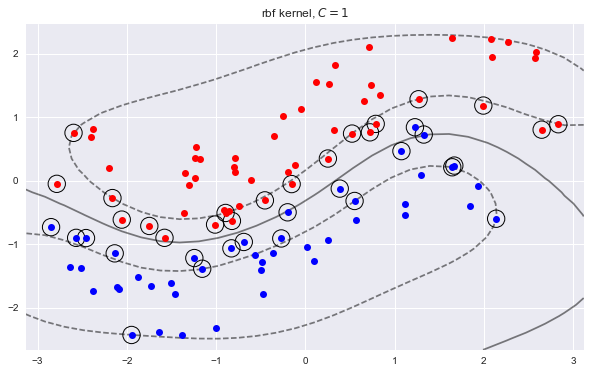

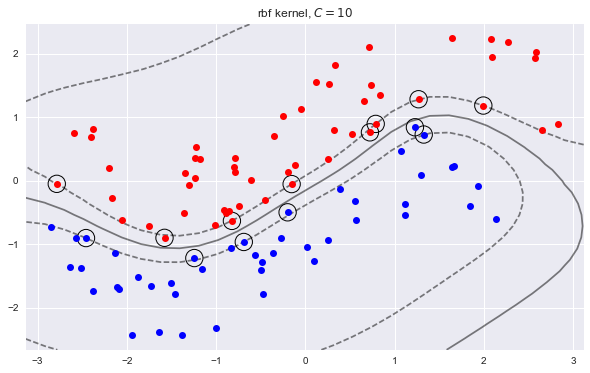

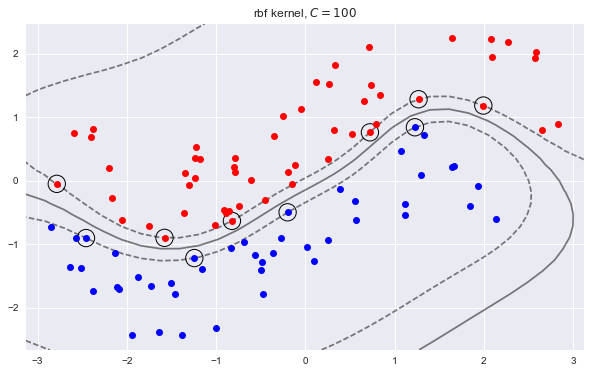

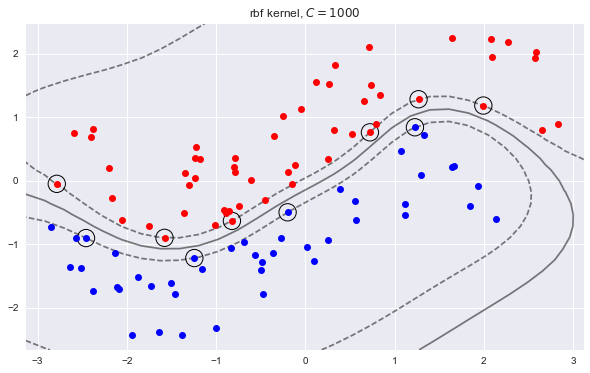

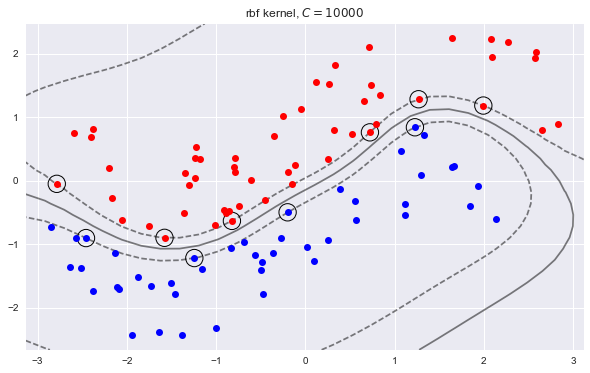

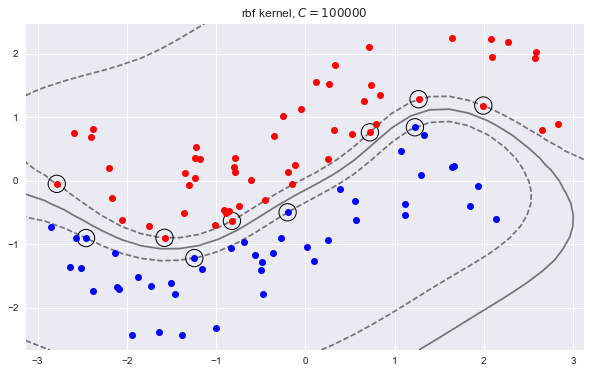

In [32]:
# linear and RBF
for kernel in ['linear', 'rbf']:
    kernsvc.set_params(kernel=kernel)
    message = '{} kernel'.format(kernel)
    if kernel == 'poly':
        kernsvc.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    # various magnitudes of C
    for C in [10**i for i in range(-3, 6)]:
        kernsvc.set_params(C=C)
        kernsvc.fit(X_sin, y_sin)
        print(message + ' with C = {}: {:.5f}'.format(C, kernsvc.score(X_sin, y_sin)))
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(message + ', $C = {}$'.format(C))
        ax.plot(X_sin[:, 0][y_sin==0], X_sin[:, 1][y_sin==0], 'bo')
        ax.plot(X_sin[:, 0][y_sin==1], X_sin[:, 1][y_sin==1], 'ro')
        plot_svc_decision_function(kernsvc, ax=ax, plot_support=True);

4 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Image Segmentation Data Set](http://archive.ics.uci.edu/ml/datasets/Image+Segmentation), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [7]:
segmentation = pd.read_csv('image_segmentation.txt', index_col=None)
segmentation.head()

,CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [13]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
CLASS                   2310 non-null object
REGION-CENTROID-COL     2310 non-null float64
REGION-CENTROID-ROW     2310 non-null float64
REGION-PIXEL-COUNT      2310 non-null int64
SHORT-LINE-DENSITY-5    2310 non-null float64
SHORT-LINE-DENSITY-2    2310 non-null float64
VEDGE-MEAN              2310 non-null float64
VEDGE-SD                2310 non-null float64
HEDGE-MEAN              2310 non-null float64
HEDGE-SD                2310 non-null float64
INTENSITY-MEAN          2310 non-null float64
RAWRED-MEAN             2310 non-null float64
RAWBLUE-MEAN            2310 non-null float64
RAWGREEN-MEAN           2310 non-null float64
EXRED-MEAN              2310 non-null float64
EXBLUE-MEAN             2310 non-null float64
EXGREEN-MEAN            2310 non-null float64
VALUE-MEAN              2310 non-null float64
SATURATION-MEAN         2310 non-null float64
HUE-MEAN              

In [8]:
segmentation.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION-CENTROID-COL,2310.0,124.913853,72.956532,1.000000e+00,62.000000,121.000000,189.000000,254.000000
REGION-CENTROID-ROW,2310.0,123.417316,57.483851,1.100000e+01,81.000000,122.000000,172.000000,251.000000
REGION-PIXEL-COUNT,2310.0,9.000000,0.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
SHORT-LINE-DENSITY-5,2310.0,0.014334,0.040154,0.000000e+00,0.000000,0.000000,0.000000,0.333333
SHORT-LINE-DENSITY-2,2310.0,0.004714,0.024234,0.000000e+00,0.000000,0.000000,0.000000,0.222222
VEDGE-MEAN,2310.0,1.893939,2.698908,0.000000e+00,0.722222,1.222224,2.166667,29.222221
VEDGE-SD,2310.0,5.709320,44.846457,0.000000e+00,0.355555,0.833333,1.806367,991.718400
HEDGE-MEAN,2310.0,2.424723,3.610084,0.000000e+00,0.777780,1.444444,2.555556,44.722225
HEDGE-SD,2310.0,8.243692,58.811517,-1.589457e-08,0.421637,0.962963,2.183269,1386.329200
INTENSITY-MEAN,2310.0,37.051595,38.176410,0.000000e+00,7.296296,21.592592,53.212964,143.444440


In [9]:
print(segmentation.describe(include=['O']))
segmentation.CLASS.value_counts()

        CLASS
count    2310
unique      7
top     GRASS
freq      330


GRASS        330
BRICKFACE    330
PATH         330
CEMENT       330
WINDOW       330
SKY          330
FOLIAGE      330
Name: CLASS, dtype: int64

In [23]:
# split
Xsegm_train, Xsegm_test, ysegm_train, ysegm_test = train_test_split(segmentation.iloc[:, 1:], segmentation.iloc[:, 0], test_size=0.3, random_state=25)
# scale
sc = StandardScaler()
sc.fit(Xsegm_train)
Xsegm_train_std = sc.fit_transform(Xsegm_train)
Xsegm_test_std = sc.fit_transform(Xsegm_test)

5 - Fit 4 SVMs to the data using `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`, leaving all other parameters at their default, printing the training and testing accuracy for each.  Comment on your results.

In [24]:
# in the solutions the results are much worse: it may be due by the fact that I performed scaling?

deg = 2

for kernel in ['linear', 'rbf', 'poly', 'poly']:
    kernsvc.set_params(kernel=kernel)
    message = '{} kernel'.format(kernel)
    if kernel == 'poly':
        kernsvc.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    kernsvc.fit(Xsegm_train_std, ysegm_train)
    print(message + ' training score: {:.5f}'.format(kernsvc.score(Xsegm_train_std, ysegm_train)))
    print(message + ' testing score: {:.5f}'.format(kernsvc.score(Xsegm_test_std, ysegm_test)))

linear kernel training score: 0.95918
linear kernel testing score: 0.95238
rbf kernel training score: 0.94063
rbf kernel testing score: 0.94805
poly kernel with degree 2 training score: 0.92455
poly kernel with degree 2 testing score: 0.90476
poly kernel with degree 3 training score: 0.86209
poly kernel with degree 3 testing score: 0.85714


Linear kernel has the best performances, it may be that RBF could outperform it with some tuning but given the added complexity I would choose a linear kernel.

6 - Repeat part (5), but this time trying different values of the `C` parameter.  Comment on your results.

In [25]:
deg = 2

for kernel in ['linear', 'rbf', 'poly', 'poly']:
    kernsvc.set_params(kernel=kernel)
    message = '{} kernel'.format(kernel)
    if kernel == 'poly':
        kernsvc.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    for C in [10**i for i in range(-3, 6)]:
        kernsvc.set_params(C=C)
        kernsvc.fit(Xsegm_train_std, ysegm_train)
        print(message + ' with C = {} training score: {:.5f}'.format(C, kernsvc.score(Xsegm_train_std, ysegm_train)))
        print(message + ' with C = {} testing score: {:.5f}'.format(C, kernsvc.score(Xsegm_test_std, ysegm_test)))

linear kernel with C = 0.001 training score: 0.82313
linear kernel with C = 0.001 testing score: 0.79076
linear kernel with C = 0.01 training score: 0.90662
linear kernel with C = 0.01 testing score: 0.90476
linear kernel with C = 0.1 training score: 0.93568
linear kernel with C = 0.1 testing score: 0.93939
linear kernel with C = 1 training score: 0.95918
linear kernel with C = 1 testing score: 0.95238
linear kernel with C = 10 training score: 0.96475
linear kernel with C = 10 testing score: 0.96104
linear kernel with C = 100 training score: 0.96970
linear kernel with C = 100 testing score: 0.96537
linear kernel with C = 1000 training score: 0.97155
linear kernel with C = 1000 testing score: 0.95382
linear kernel with C = 10000 training score: 0.97341
linear kernel with C = 10000 testing score: 0.92352
linear kernel with C = 100000 training score: 0.97279
linear kernel with C = 100000 testing score: 0.92208
rbf kernel with C = 0.001 training score: 0.14780
rbf kernel with C = 0.001 tes

With some tuning all the kernels reach about the same accuracy on the test set (96%).

7 - Using `rbf` and `poly` (`degree = 2`) kernels, fit a SVM while trying a few values for the `gamma` parameter, printing the training and testing errors.  Comment on your results. 

In [26]:
deg = 2

# solution: gamma in np.logspace(-9, 3, 13)

for kernel in ['rbf', 'poly']:
    kernsvc.set_params(kernel=kernel)
    message = '{} kernel'.format(kernel)
    if kernel == 'poly':
        kernsvc.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    for gamma in [0.1, 0.3, 1, 3, 10]:
        kernsvc.set_params(gamma=gamma)
        kernsvc.fit(Xsegm_train_std, ysegm_train)
        print(message + ' with gamma = {} training score: {:.5f}'.format(gamma, kernsvc.score(Xsegm_train_std, ysegm_train)))
        print(message + ' with gamma = {} testing score: {:.5f}'.format(gamma, kernsvc.score(Xsegm_test_std, ysegm_test)))

rbf kernel with gamma = 0.1 training score: 1.00000
rbf kernel with gamma = 0.1 testing score: 0.94949
rbf kernel with gamma = 0.3 training score: 1.00000
rbf kernel with gamma = 0.3 testing score: 0.95382
rbf kernel with gamma = 1 training score: 1.00000
rbf kernel with gamma = 1 testing score: 0.93362
rbf kernel with gamma = 3 training score: 1.00000
rbf kernel with gamma = 3 testing score: 0.89177
rbf kernel with gamma = 10 training score: 1.00000
rbf kernel with gamma = 10 testing score: 0.73882
poly kernel with degree 2 with gamma = 0.1 training score: 0.99814
poly kernel with degree 2 with gamma = 0.1 testing score: 0.94517
poly kernel with degree 2 with gamma = 0.3 training score: 0.99938
poly kernel with degree 2 with gamma = 0.3 testing score: 0.94228
poly kernel with degree 2 with gamma = 1 training score: 1.00000
poly kernel with degree 2 with gamma = 1 testing score: 0.94661
poly kernel with degree 2 with gamma = 3 training score: 1.00000
poly kernel with degree 2 with gamm

Increasing $\gamma$, expecially for the polynomial kernel, seems to produce better training accuracies. For greater values the training accuracies starts to get worst.

## SVM Regression
As it turns out Support Vector Machines can also be used for regression tasks.  In this exercise, we'll use SVMs for just that on both user generated and real world data.

1 - Generate 500 data points for a damped oscillator given by the function $$f(x) = e^{-\beta x}sin(\nu x)$$ on the range $-2\pi < x < 2\pi$, where $\beta =  \frac{1}{2.5}$ and $\nu = 10$.  Plot your function and ensure it looks as expected.

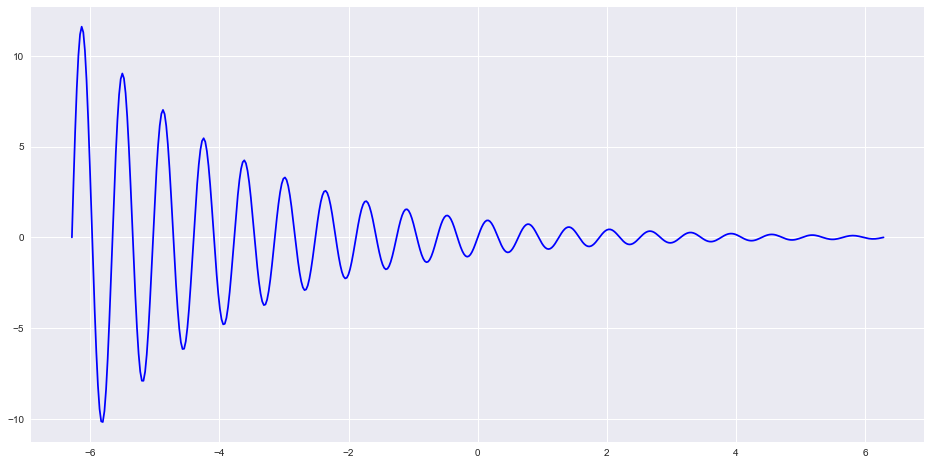

In [12]:
# oscillator params
beta = 1/2.5
nu = 10
# evenly spaced points between a and b
a = -2*np.pi
b = 2*np.pi
X1_regr = np.linspace(a, b, 500)
# apply oscillator equation
X2_regr = np.exp(-beta*X1_regr) * np.sin(nu*X1_regr)
#stack coordinates
X_regr = np.vstack((X1_regr, X2_regr)).T
# plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_regr[:, 0], X_regr[:, 1], 'b');

2 - Fit a linear regression model to the data in part (1), put the line on the same plot, and report the $R^2$ of the fit, MSE, and coefficients of the fit.

In [13]:
from sklearn.svm import LinearSVR

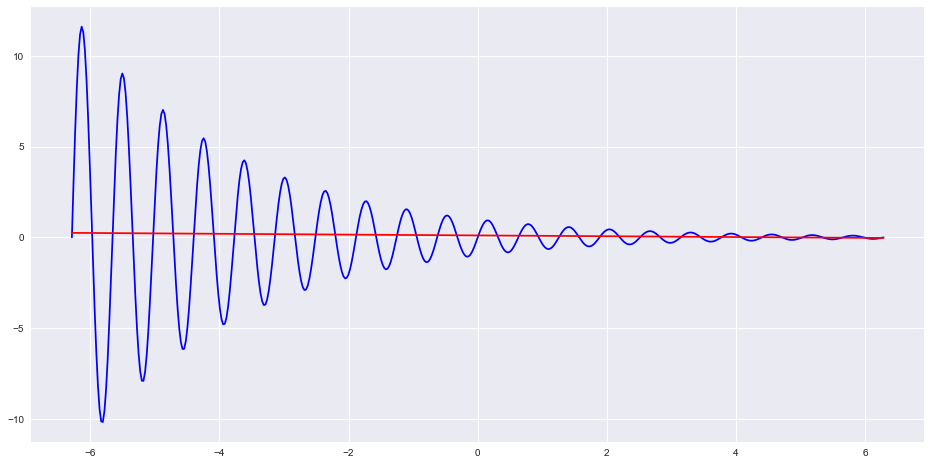

In [15]:
linsvr = LinearSVR()
# fit
linsvr.fit(X1_regr.reshape(-1, 1), X2_regr)
# predict
predictions = linsvr.predict(X1_regr.reshape(-1, 1))
# plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_regr[:, 0], X_regr[:, 1], 'b')
ax.plot(X_regr[:, 0], predictions, 'r');

As we may have expected, the prediction is almost a horizontal line at 0.

In [18]:
# oops, I did linear SVM instead of regression, the results are almost the same though
# also, something strange is going on with how I calculated the MSE vs the mean_squared_error function of sklearn
# (which I didn't know existed...)
def MSE(predictions, y):
    residuals = predictions - y
    return (residuals**2).mean()

In [19]:
print('R-squared: {:.5f}'.format(linsvr.score(X1_regr.reshape(-1, 1), X2_regr)))
print('Slope and intercept: {:.5f}, {:.5f}'.format(linsvr.coef_[0], linsvr.intercept_[0]))
print('MSE: {:.5f}'.format(MSE(predictions, X2_regr)))

R-squared: 0.00276
Slope and intercept: -0.02240, 0.10730
MSE: 7.52231


The scores aren't that good...

3 - Repeat part (2) but using SVM with `linear`, `rbf`, and `poly` kernels of `degree = 2` and `degree = 3`.  Comment on your results.

In [14]:
from sklearn.svm import SVR

linear kernel R-squared: 0.00201
linear kernel MSE: 7.52794
rbf kernel R-squared: 0.04199
rbf kernel MSE: 7.22640
poly kernel with degree 2 R-squared: -0.00075
poly kernel with degree 2 MSE: 7.54881
poly kernel with degree 3 R-squared: 0.00279
poly kernel with degree 3 MSE: 7.52209


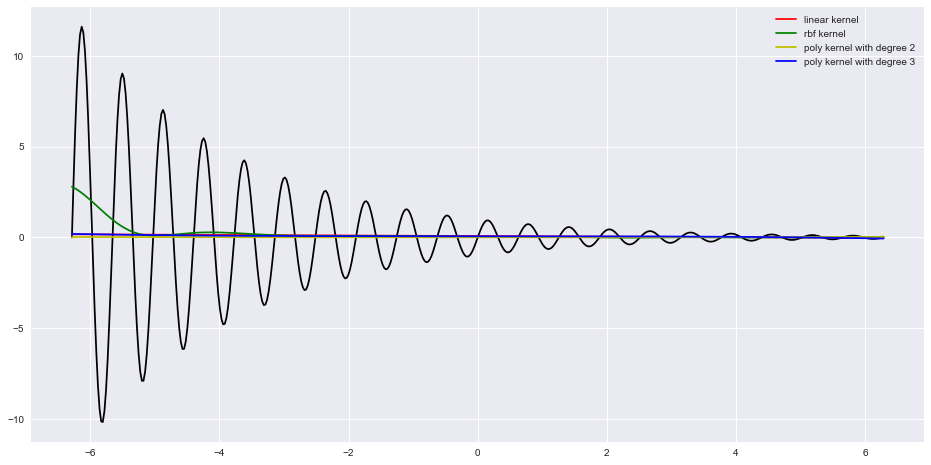

In [21]:
svr = SVR()
deg = 2
# plot oscillator
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_regr[:, 0], X_regr[:, 1], 'k')
# different kernels and corresponding colors
for kernel, color in zip(['linear', 'rbf', 'poly', 'poly'], ['r', 'g', 'y', 'b']):
    # set kernel
    svr.set_params(kernel=kernel)
    # create message for reporting results
    message = '{} kernel'.format(kernel)
    # if poly kernel, set degree and add 1 to deg
    if kernel == 'poly':
        svr.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    # fit
    svr.fit(X1_regr.reshape(-1, 1), X2_regr)
    #predict
    predictions = svr.predict(X1_regr.reshape(-1, 1))
    # print scores
    print(message + ' R-squared: {:.5f}'.format(svr.score(X1_regr.reshape(-1, 1), X2_regr)))
    print(message + ' MSE: {:.5f}'.format(MSE(predictions, X2_regr)))
    # add predicted curve to the plot
    ax.plot(X_regr[:, 0], predictions, color, label=message)
# add legend
plt.legend();

The results are almost the same for all kernels, only the RBF isn't a straight line but still it's pretty bad at predicting the curve.

4 - Using a `rbf` kernel, experiment with the `gamma` and `epsilon` parameters to try to fit the function.  Comment on your results.

In [23]:
# set kernel
svr.set_params(kernel='rbf')
# different gammas
for gamma in [0.1, 0.3, 1, 3, 10]:
    # set params
    svr.set_params(gamma=gamma)
    # create message for reporting results
    message = 'rbf kernel for gamma = {}'.format(gamma)
    # different epsilons
    for epsilon in [0.1, 0.3, 1, 3, 10]:
        # set params
        svr.set_params(epsilon=epsilon)
        # update message
        message2 = message + ' and epsilon = {}'.format(epsilon)
        # fit
        svr.fit(X1_regr.reshape(-1, 1), X2_regr)
        # predict
        predictions = svr.predict(X1_regr.reshape(-1, 1))
        # score
        print(message2 + ' R-squared: {:.5f}'.format(svr.score(X1_regr.reshape(-1, 1), X2_regr)))
        print(message2 + ' MSE: {:.5f}'.format(MSE(predictions, X2_regr)))

rbf kernel for gamma = 0.1 and epsilon = 0.1 R-squared: 0.01806
rbf kernel for gamma = 0.1 and epsilon = 0.1 MSE: 7.40686
rbf kernel for gamma = 0.1 and epsilon = 0.3 R-squared: 0.01912
rbf kernel for gamma = 0.1 and epsilon = 0.3 MSE: 7.39891
rbf kernel for gamma = 0.1 and epsilon = 1 R-squared: 0.00359
rbf kernel for gamma = 0.1 and epsilon = 1 MSE: 7.51603
rbf kernel for gamma = 0.1 and epsilon = 3 R-squared: -0.09136
rbf kernel for gamma = 0.1 and epsilon = 3 MSE: 8.23225
rbf kernel for gamma = 0.1 and epsilon = 10 R-squared: -0.01370
rbf kernel for gamma = 0.1 and epsilon = 10 MSE: 7.64643
rbf kernel for gamma = 0.3 and epsilon = 0.1 R-squared: 0.02669
rbf kernel for gamma = 0.3 and epsilon = 0.1 MSE: 7.34178
rbf kernel for gamma = 0.3 and epsilon = 0.3 R-squared: 0.02665
rbf kernel for gamma = 0.3 and epsilon = 0.3 MSE: 7.34209
rbf kernel for gamma = 0.3 and epsilon = 1 R-squared: 0.01158
rbf kernel for gamma = 0.3 and epsilon = 1 MSE: 7.45578
rbf kernel for gamma = 0.3 and epsil

The best scores are for $\gamma = 10$, so I'll try some greater values:

In [24]:
# different gammas
for gamma in [10, 30, 100]:
    # set params
    svr.set_params(gamma=gamma)
    # create message for reporting results
    message = 'rbf kernel for gamma = {}'.format(gamma)
    # different epsilons
    for epsilon in [0.1, 0.3, 1, 3, 10]:
        # set params
        svr.set_params(epsilon=epsilon)
        # update message
        message2 = message + ' and epsilon = {}'.format(epsilon)
        # fit
        svr.fit(X1_regr.reshape(-1, 1), X2_regr)
        # predict
        predictions = svr.predict(X1_regr.reshape(-1, 1))
        # score
        print(message2 + ' R-squared: {:.5f}'.format(svr.score(X1_regr.reshape(-1, 1), X2_regr)))
        print(message2 + ' MSE: {:.5f}'.format(MSE(predictions, X2_regr)))

rbf kernel for gamma = 10 and epsilon = 0.1 R-squared: 0.58325
rbf kernel for gamma = 10 and epsilon = 0.1 MSE: 3.14356
rbf kernel for gamma = 10 and epsilon = 0.3 R-squared: 0.57772
rbf kernel for gamma = 10 and epsilon = 0.3 MSE: 3.18534
rbf kernel for gamma = 10 and epsilon = 1 R-squared: 0.54402
rbf kernel for gamma = 10 and epsilon = 1 MSE: 3.43948
rbf kernel for gamma = 10 and epsilon = 3 R-squared: 0.41506
rbf kernel for gamma = 10 and epsilon = 3 MSE: 4.41226
rbf kernel for gamma = 10 and epsilon = 10 R-squared: 0.00874
rbf kernel for gamma = 10 and epsilon = 10 MSE: 7.47721
rbf kernel for gamma = 30 and epsilon = 0.1 R-squared: 0.93770
rbf kernel for gamma = 30 and epsilon = 0.1 MSE: 0.46995
rbf kernel for gamma = 30 and epsilon = 0.3 R-squared: 0.93109
rbf kernel for gamma = 30 and epsilon = 0.3 MSE: 0.51983
rbf kernel for gamma = 30 and epsilon = 1 R-squared: 0.88349
rbf kernel for gamma = 30 and epsilon = 1 MSE: 0.87884
rbf kernel for gamma = 30 and epsilon = 3 R-squared: 0

$\gamma = 30$ looks good, let's try some smaller values for $\epsilon$.

In [27]:
svr.set_params(gamma=30)
# create message for reporting results
message = 'rbf kernel for gamma = {}'.format(gamma)
# different epsilons
for epsilon in [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]:
    # set params
    svr.set_params(epsilon=epsilon)
    # update message
    message2 = message + ' and epsilon = {}'.format(epsilon)
    # fit
    svr.fit(X1_regr.reshape(-1, 1), X2_regr)
    # predict
    predictions = svr.predict(X1_regr.reshape(-1, 1))
    # score
    print(message2 + ' R-squared: {:.5f}'.format(svr.score(X1_regr.reshape(-1, 1), X2_regr)))
    print(message2 + ' MSE: {:.5f}'.format(MSE(predictions, X2_regr)))

rbf kernel for gamma = 100 and epsilon = 1e-05 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 1e-05 MSE: 0.46279
rbf kernel for gamma = 100 and epsilon = 3e-05 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 3e-05 MSE: 0.46279
rbf kernel for gamma = 100 and epsilon = 0.0001 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 0.0001 MSE: 0.46278
rbf kernel for gamma = 100 and epsilon = 0.0003 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 0.0003 MSE: 0.46278
rbf kernel for gamma = 100 and epsilon = 0.001 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 0.001 MSE: 0.46277
rbf kernel for gamma = 100 and epsilon = 0.003 R-squared: 0.93865
rbf kernel for gamma = 100 and epsilon = 0.003 MSE: 0.46275
rbf kernel for gamma = 100 and epsilon = 0.01 R-squared: 0.93862
rbf kernel for gamma = 100 and epsilon = 0.01 MSE: 0.46299
rbf kernel for gamma = 100 and epsilon = 0.03 R-squared: 0.93855
rbf kernel for gamma = 100 and epsilon = 0.03 MSE: 

Let's go with $\epsilon = 0.001$ and see the plot of the predicted curve:

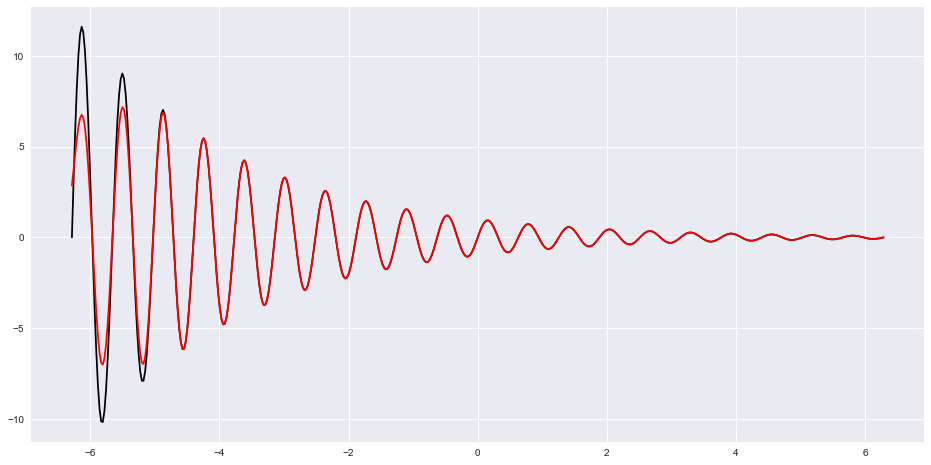

In [29]:
svr.set_params(epsilon=0.001)
# fit
svr.fit(X1_regr.reshape(-1, 1), X2_regr)
# predict
predictions = svr.predict(X1_regr.reshape(-1, 1))
# plot oscillator
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(X_regr[:, 0], X_regr[:, 1], 'k')
# add predicted curve to the plot
ax.plot(X_regr[:, 0], predictions, 'r');

It's quite good!

5 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Concrete Slump Test Data Set](http://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [15]:
concrete = pd.read_csv('concrete.txt')
concrete.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAggr,FineAggr,SLUMP,FLOW,CompressiveStrength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [16]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
No                     103 non-null int64
Cement                 103 non-null float64
Slag                   103 non-null float64
FlyAsh                 103 non-null float64
Water                  103 non-null float64
SP                     103 non-null float64
CoarseAggr             103 non-null float64
FineAggr               103 non-null float64
SLUMP                  103 non-null float64
FLOW                   103 non-null float64
CompressiveStrength    103 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.9 KB


In [17]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
No,103.0,52.000000,29.877528,1.00,26.50,52.00,77.500,103.00
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
FlyAsh,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
CoarseAggr,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
FineAggr,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP,103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW,103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00


In [20]:
# split
Xconcrete_train, Xconcrete_test, yconcrete_train, yconcrete_test = train_test_split(concrete.iloc[:, 1:-1], concrete.iloc[:, -1], test_size=0.3, random_state=59)
# scale
sc = StandardScaler()
sc.fit(Xconcrete_train)
Xconcrete_train_std = sc.fit_transform(Xconcrete_train)
Xconcrete_test_std = sc.fit_transform(Xconcrete_test)

6 - Fit a SVM model to the data, using kernels of your choice, and adjusting the parameters as you see fit.  Report your training and testing errors and compare to a standard linear regression model.  Comment on your results.

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
# solution: let's try a simple linear regression first!

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(Xconcrete_train_std, yconcrete_train)

concrete_train_pred = lm.predict(Xconcrete_train_std)
concrete_test_pred = lm.predict(Xconcrete_test_std)

print('Training R-squared: {:.5f}'.format(lm.score(Xconcrete_train_std, yconcrete_train)))
print('Training MSE: {:.5f}'.format(mean_squared_error(concrete_train_pred, yconcrete_train)))
print('Testing R-squared: {:.5f}'.format(lm.score(Xconcrete_test_std, yconcrete_test)))
print('Testing MSE: {:.5f}'.format(mean_squared_error(concrete_test_pred, yconcrete_test)))

Training R-squared: 0.92067
Training MSE: 4.97651
Testing R-squared: 0.74894
Testing MSE: 13.48261


In [26]:
svr.set_params(kernel='poly')
svr.fit(Xconcrete_train_std, yconcrete_train)
concrete_train_pred = svr.predict(Xconcrete_train_std)
concrete_test_pred = svr.predict(Xconcrete_test_std)
print('Training R-squared: {:.5f}'.format(svr.score(Xconcrete_train_std, yconcrete_train)))
print('Training MSE: {:.5f}'.format(mean_squared_error(concrete_train_pred, yconcrete_train)))
print('Testing R-squared: {:.5f}'.format(svr.score(Xconcrete_test_std, yconcrete_test)))
print('Testing MSE: {:.5f}'.format(mean_squared_error(concrete_test_pred, yconcrete_test)))

Training R-squared: 0.48308
Training MSE: 32.42640
Testing R-squared: 0.33527
Testing MSE: 35.69807


In [29]:
deg = 2

for kernel in ['linear', 'rbf', 'poly', 'poly', 'poly']:
    # set kernel
    svr.set_params(kernel=kernel)
    # create message for reporting results
    message = '{} kernel'.format(kernel)
    # if poly kernel, set degree and add 1 to deg
    if kernel == 'poly':
        svr.set_params(degree=deg)
        message = message + ' with degree {}'.format(deg)
        deg += 1
    # fit
    svr.fit(Xconcrete_train_std, yconcrete_train)
    # predict
    concrete_train_pred = svr.predict(Xconcrete_train_std)
    concrete_test_pred = svr.predict(Xconcrete_test_std)
    # score
    print('Training R-squared for {}: {:.5f}'.format(message, svr.score(Xconcrete_train_std, yconcrete_train)))
    print('Training MSE for {}: {:.5f}'.format(message, mean_squared_error(concrete_train_pred, yconcrete_train)))
    print('Testing R-squared for {}: {:.5f}'.format(message, svr.score(Xconcrete_test_std, yconcrete_test)))
    print('Testing MSE for {}: {:.5f}'.format(message, mean_squared_error(concrete_test_pred, yconcrete_test)))

Training R-squared for linear kernel: 0.90692
Training MSE for linear kernel: 5.83876
Testing R-squared for linear kernel: 0.68852
Testing MSE for linear kernel: 16.72713
Training R-squared for rbf kernel: 0.43345
Training MSE for rbf kernel: 35.53980
Testing R-squared for rbf kernel: 0.25904
Testing MSE for rbf kernel: 39.79162
Training R-squared for poly kernel with degree 2: 0.19392
Training MSE for poly kernel with degree 2: 50.56564
Testing R-squared for poly kernel with degree 2: -0.00907
Testing MSE for poly kernel with degree 2: 54.18980
Training R-squared for poly kernel with degree 3: 0.48308
Training MSE for poly kernel with degree 3: 32.42640
Testing R-squared for poly kernel with degree 3: 0.33527
Testing MSE for poly kernel with degree 3: 35.69807
Training R-squared for poly kernel with degree 4: 0.29170
Training MSE for poly kernel with degree 4: 44.43194
Testing R-squared for poly kernel with degree 4: -0.07500
Testing MSE for poly kernel with degree 4: 57.73053


We have really bad generalization for most of the kernels, the better is linear in this sense but the overall results aren't good. I could try to regularize a polynomial kernel of degree 4:

In [ ]:
# solution: good results for poly degree 2 with gamma = 0.001

In [40]:
svr.set_params(kernel='poly', degree=4)

for C in [10**i for i in range(-10, -2)]:
    # set params
    svr.set_params(C=C)
    # create message for reporting results
    message = 'Poly kernel of degree 4 kernel with C={}'.format(C)
    # fit
    svr.fit(Xconcrete_train_std, yconcrete_train)
    # predict
    concrete_train_pred = svr.predict(Xconcrete_train_std)
    concrete_test_pred = svr.predict(Xconcrete_test_std)
    # score
    print('Training R-squared for {}: {:.5f}'.format(message, svr.score(Xconcrete_train_std, yconcrete_train)))
    print('Training MSE for {}: {:.5f}'.format(message, MSE(concrete_train_pred, yconcrete_train)))
    print('Testing R-squared for {}: {:.5f}'.format(message, svr.score(Xconcrete_test_std, yconcrete_test)))
    print('Testing MSE for {}: {:.5f}'.format(message, MSE(concrete_test_pred, yconcrete_test)))

Training R-squared for Poly kernel of degree 4 kernel with C=1e-10: -0.15913
Training MSE for Poly kernel of degree 4 kernel with C=1e-10: 79.01733
Testing R-squared for Poly kernel of degree 4 kernel with C=1e-10: -0.11779
Testing MSE for Poly kernel of degree 4 kernel with C=1e-10: 104.66415
Training R-squared for Poly kernel of degree 4 kernel with C=1e-09: -0.13110
Training MSE for Poly kernel of degree 4 kernel with C=1e-09: 77.10683
Testing R-squared for Poly kernel of degree 4 kernel with C=1e-09: -0.11441
Testing MSE for Poly kernel of degree 4 kernel with C=1e-09: 104.34754
Training R-squared for Poly kernel of degree 4 kernel with C=1e-08: 0.08934
Training MSE for Poly kernel of degree 4 kernel with C=1e-08: 62.07948
Testing R-squared for Poly kernel of degree 4 kernel with C=1e-08: -0.09525
Testing MSE for Poly kernel of degree 4 kernel with C=1e-08: 102.55335
Training R-squared for Poly kernel of degree 4 kernel with C=1e-07: 0.47737
Training MSE for Poly kernel of degree 4

There's not too much to do it seems...